# SpecFile

This is an example ipython notebook showing the functionality of the __pyEvalData__ module.

## Imports

In [1]:
#numpy
from numpy import *
# plotting matplotlib
import matplotlib as mpl
mpl.use('nbagg')
from matplotlib.pyplot import *
# fitting lmfit
from lmfit import Parameters, Model
# pyEvalModule 
import evalData

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Setting

In [2]:
# configure to autoload all extension
%load_ext autoreload
%autoreload 2

# just plotting defaults
# use '%matplotlib notebook' for interactive graphs
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['figure.max_open_warning'] = 100
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size']=14
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.weight']='normal'
mpl.rcParams['axes.titlesize']=16
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['ytick.labelsize']=10
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['figure.facecolor']='w'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.fontsize'] = 10

%config InlineBackend.figure_format = "svg"

## pyEvalData Setup

In [3]:
# load sepc file
eds = evalData.spec('exampelSpecFile', './', specFileExt='.spec')
# define custom counters
#             counterName  :  counterDefinition
eds.cDef = {
             'pAPD'        : 'APD1', 
             'uAPD'        : 'APD2', 
             'relAPD'      : 'pAPD/uAPD',
             'relH'        : 'PumpedH/UnpumpedH', 
             'relS'        : 'PumpedS/UnpumpedS', 
             'relSmH'      : '(PumpedS-PumpedH)/(UnpumpedS-UnpumpedH)', 
             'PumpedSmH'   : '(PumpedS-PumpedH)', 
             'UnpumpedSmH' : '(UnpumpedS-UnpumpedH)', 
             'PpUS'        : '(PumpedS+UnpumpedS)', 
             'PpUH'        : '(PumpedH+UnpumpedH)', 
             'PpUSmH'      : '(PumpedS-PumpedH+UnpumpedS-UnpumpedH)' 
            }


XU.io.SPECFile.Update: reparsing file for new scans ...
XU.io.SPECScan.ReadData: scan_1: 41 101 101
XU.io.SPECScan.ReadData: scan_2: 31 101 101
XU.io.SPECScan.ReadData: scan_3: 31 101 101
XU.io.SPECScan.ReadData: scan_4: 61 100 100
XU.io.SPECScan.ReadData: scan_5: 61 100 100


## Plot Scans

Plots a list of scans and averages them. Allows also binning on a new grid using the _xGrid_ parameter.

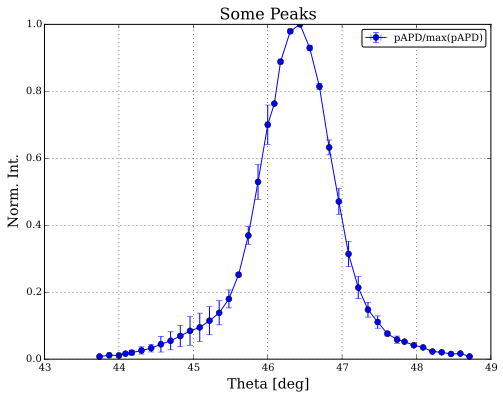

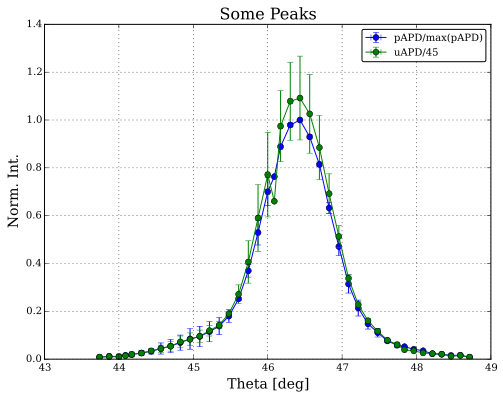

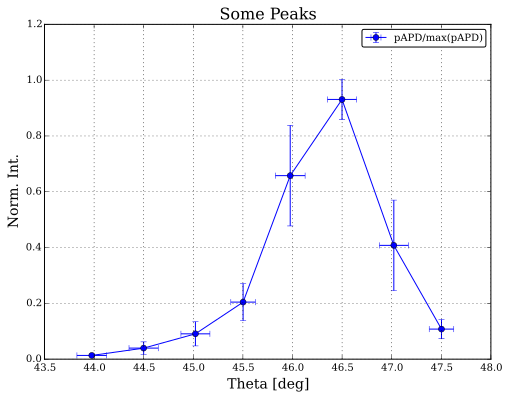

In [4]:
# this is the list of scans to average and plot
scanList = [1, 2, 3]

eds.xCol='Theta' # the x-axis
# define a the counter
# allowed keywords are: 'mean', 'sum', 'diff', 'max', 'min', 'round', 'abs'
eds.cList = ['pAPD/max(pAPD)'] 

# plot the results
figure()
y2plot, x2plot, yerr2plot, xerr2plot, name = eds.plotScans(
                                                scanList, titleText='Some Peaks', 
                                                xText='Theta [deg]', yText='Norm. Int.')
show()

# add additional counters
eds.cList = ['pAPD/max(pAPD)', 'uAPD/45'] 
figure()
eds.plotScans(scanList, titleText='Some Peaks', xText='Theta [deg]', yText='Norm. Int.')
show()


# use a new grid
eds.cList = ['pAPD/max(pAPD)'] 
figure()
eds.plotScans(scanList, titleText='Some Peaks', xText='Theta [deg]', yText='Norm. Int.', xGrid=r_[44:48:0.5])
show()

## Plot Scan Sequences

Plot a scan lists for each parameters. The parameters can be either strings or floats.
The type of the sequence must be given in the `plotScanSequence` method: 

`sequenceType = ['fluence', 'delay', 'energy', 'theta', 'text']`

Allows for all parameters of the `plotScans` method.

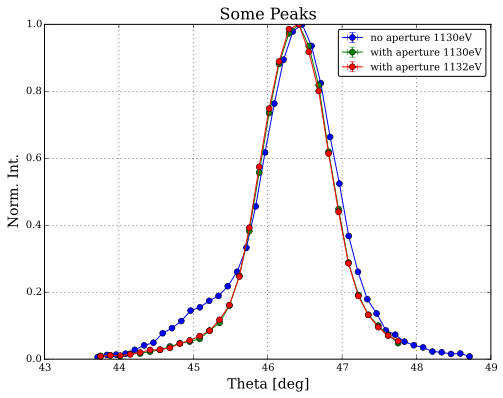

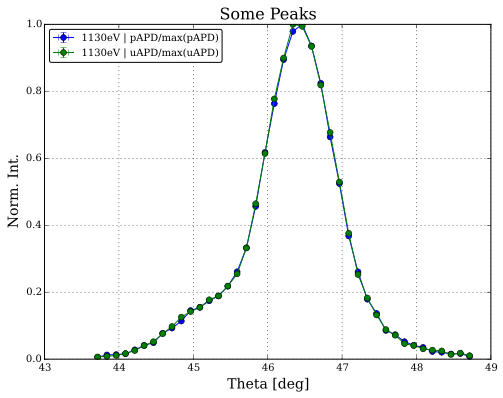

In [5]:
scanSequence = array([
        # scan list   ,  parameters
        [[1]        , 'no aperture 1130eV'], 
        [[2]        , 'with aperture 1130eV'],        
        [[3]        , 'with aperture 1132eV'],
    ])

eds.xCol='Theta' # the x-axis
# define a the counter
# allowed keywords are: 'mean', 'sum', 'diff', 'max', 'min', 'round', 'abs'
eds.cList = ['pAPD/max(pAPD)']

# plot the sequence
figure()
sequenceData, parameters, names, labelTexts = eds.plotScanSequence(
                        scanSequence, titleText='Some Peaks', xText='Theta [deg]', 
                        yText='Norm. Int.', sequenceType='text')
show()


# add more counters
scanSequence = array([
        [[1], '1130eV'],
    ])

eds.xCol='Theta'
eds.cList = ['pAPD/max(pAPD)', 'uAPD/max(uAPD)']

figure()
eds.plotScanSequence(scanSequence, titleText='Some Peaks', xText='Theta [deg]', 
                     yText='Norm. Int.', sequenceType='text')
show()


## Fit Scan Sequence

Similar to the `plotScanSequence` method but adds additional fitting capabilities using the `lmfit` package.

In [6]:
# define the fitting function
def attenuator(x, Pm, P0, attOffset):    

    return Pm*(sin((x-attOffset)*2/180.*pi)**2+P0)

# create a fit model using the lmfit Model class
mod = Model(attenuator)    

# create fit parameters using the lmfit Parameters class
pars = Parameters()
pars.add('Pm', value=1,vary=True, min=0)
pars.add('P0', value=0,vary=True, min=0)
pars.add('attOffset', value=0,vary=True)


========== Parameter: one scan ===============

---------- PowerMeter: ---------------
   attOffset:      3.1342 
          P0:      0.0000 
          Pm:      0.9685 
________________________________________
[[Model]]
    Model(attenuator)
[[Fit Statistics]]
    # function evals   = 17
    # data points      = 61
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
[[Variables]]
    Pm:          0.96847545 +/- nan      (nan%) (init= 1), model_value = 1
    P0:          0          +/- nan      (nan%) (init= 0), model_value = 0
    attOffset:   3.13421884 +/- nan      (nan%) (init= 0), model_value = 0
[[Correlations]] (unreported correlations are <  0.100)

========== Parameter: another scan ===============

---------- PowerMeter: ---------------
   attOffset:     -0.8285 
          P0:      0.0000 
          Pm:      0.9741 
________________________________________
[[Model]]
    Model(attenuator)
[[Fit Statistics]]
    # function evals   = 13
    # 

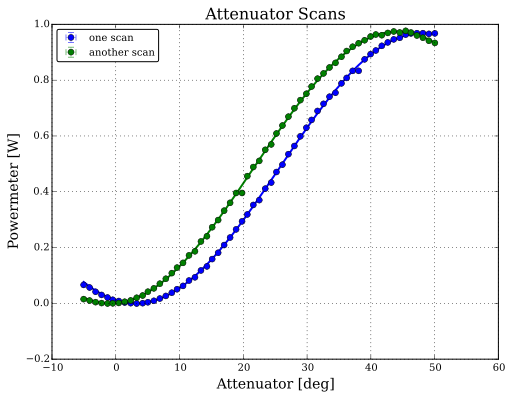

In [7]:
scanSequence = array([
                        [[4]    , 'one scan'],
                        [[5]    , 'another scan'],
                      ])

# x- and y-axis
eds.xCol = 'Attenuator'
eds.cList = ['PowerMeter']

figure()
results, parameters, data = eds.fitScanSequence(scanSequence, mod, pars, yErr = 'none', xErr = 'none', 
                                                norm2one=False, fitReport=2, weights=False, sequenceType='text', 
                                                showSingle=False, titleText='Attenuator Scans', 
                                                xText='Attenuator [deg]', yText='Powermeter [W]')
show()